In [2]:
import glob
import os
import pandas as pd
import numpy as np

# Data

Load datasets from their different folders, they are separated in two:
1. Dataset that comes from in-field data collection
2. Dataset that comes from the supervision of one night with a high anxiety scenario followed by sleep

In [3]:
def read_multiple_files(directory):
    ''' Read multiple EEG recordings in directory '''
    dfs_folders = []
    for folder in os.listdir(directory):
        if '.' not in folder:
            print(folder)
            folder_files = glob.glob(directory+ '/' +folder + '/*')
            folder_dataframes = [pd.read_csv(f, low_memory=False) for f in folder_files]
            df_folder = pd.concat(folder_dataframes, sort=True)
            df_folder['Folder'] = folder
            dfs_folders.append(df_folder)
    df = pd.concat(dfs_folders, sort=True)
    return df

In [4]:
df = read_multiple_files('data')

anxiety_and_sleep_eeg
basal_eeg


In [5]:
# Add timestamp
df = df.set_index(pd.DatetimeIndex(df['TimeStamp']))

In [6]:
# Remove mysterious column that appears from concatenation
try:
    del df['Unnamed: 0'] 
except:
    None

In [7]:
df.keys()

Index(['AUX_RIGHT', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Alpha_TP9', 'Battery',
       'Beta_AF7', 'Beta_AF8', 'Beta_TP10', 'Beta_TP9', 'Delta_AF7',
       'Delta_AF8', 'Delta_TP10', 'Delta_TP9', 'Elements', 'Folder',
       'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10', 'Gamma_TP9', 'Gyro_X', 'Gyro_Y',
       'Gyro_Z', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'HSI_TP9', 'HeadBandOn',
       'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'RAW_TP9', 'Theta_AF7', 'Theta_AF8',
       'Theta_TP10', 'Theta_TP9', 'TimeStamp'],
      dtype='object')

In [8]:
df.head()

,AUX_RIGHT,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Alpha_AF7,Alpha_AF8,Alpha_TP10,Alpha_TP9,Battery,Beta_AF7,...,HeadBandOn,RAW_AF7,RAW_AF8,RAW_TP10,RAW_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Theta_TP9,TimeStamp
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-03-06 06:08:22.434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06 06:08:22.434
2020-03-06 06:08:22.633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06 06:08:22.633
2020-03-06 06:08:22.934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06 06:08:22.934
2020-03-06 06:08:23.398,755.897436,-0.917236,0.214294,0.357239,0.286422,0.046419,0.685609,0.560574,100.0,0.131055,...,1.0,784.908425,799.816850,474.249084,429.120879,0.157565,0.312778,0.513176,0.57944,2020-03-06 06:08:23.398
2020-03-06 06:08:24.392,145.860806,-0.915955,0.212708,0.355042,0.004473,-0.068840,0.899300,0.560574,100.0,0.230174,...,1.0,753.882784,831.245421,306.630037,219.194139,-0.036244,0.225367,1.142064,0.57944,2020-03-06 06:08:24.392


## Exploration

Separate dataframes to three anxiogenic scenarios:
* Basal = Subjectively Normal Anxiety
* High Anxiety = Moderate-High Anxiety
* Sleep = Sleep after High Anxiety

In [9]:
df_basal = df[df['Folder'] == 'basal_eeg'].copy()
df_anxiety_sleep = df[df['Folder'] == 'anxiety_and_sleep_eeg'].copy()

In [10]:
df_basal = df_basal['2020-03-05 18:10':'2020-03-05 18:50']
df_anxiety = df_anxiety_sleep['2020-03-06 06:10':'2020-03-06 06:50']
df_sleep = df_anxiety_sleep['2020-03-06 06:51':'2020-03-06 08:30']

Curious about jaw clenching and eye blinking rates

In [11]:
def blink_jaw_ratio(df):
    df_elements = df['Elements'].value_counts()
    print(df_elements)
    df_elements_keys = list(df_elements.keys())
    return df_elements[df_elements_keys[0]]/df_elements[df_elements_keys[1]]

In [12]:
blink_jaw_ratio(df_basal)

/muse/elements/blink         1420
/muse/elements/jaw_clench     127
Name: Elements, dtype: int64


11.181102362204724

In [13]:
blink_jaw_ratio(df_anxiety)

/muse/elements/blink         1348
/muse/elements/jaw_clench      61
Name: Elements, dtype: int64


22.098360655737704

In [14]:
blink_jaw_ratio(df_sleep)

/muse/elements/blink         64
/muse/elements/jaw_clench     1
Name: Elements, dtype: int64


64.0

Interesting patterns found in comparison.

More on EBR:

* Pinkney, V., Wickens, R., Bamford, S., Baldwin, D. S., & Garner, M. (2014). Defensive eye-blink startle responses in a human experimental model of anxiety. Journal of Psychopharmacology, 28(9), 874–880. [https://doi.org/10.1177/0269881114532858](https://doi.org/10.1177/0269881114532858)

## Plots

Quick viz using all delta measurements.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
delta_columns = ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']

In [17]:
plt.rcParams['figure.figsize'] = [20, 8]

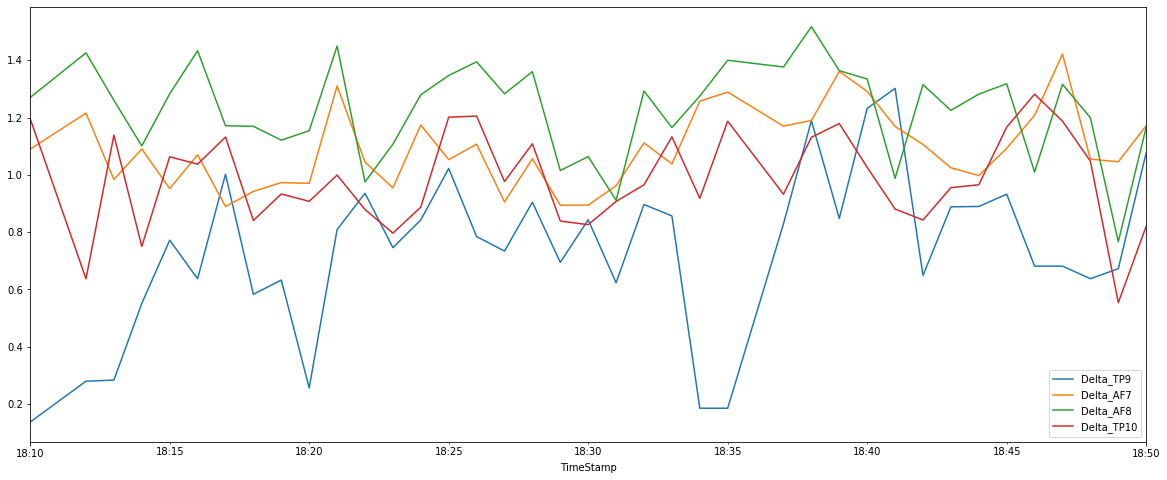

In [18]:
minutal_basal = df_basal.index.to_period('Min')
df_basal.groupby(minutal_basal)[delta_columns].apply(lambda x: np.mean(x)).plot()

In [19]:
(df_basal.groupby(minutal_basal)[delta_columns].apply(lambda x: np.mean(x))).head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10
TimeStamp,,,,
2020-03-05 18:10,0.137434,1.089585,1.270004,1.195838
2020-03-05 18:12,0.279877,1.215448,1.425738,0.637263
2020-03-05 18:13,0.283871,0.983853,1.260210,1.138549
2020-03-05 18:14,0.551330,1.090139,1.100792,0.750156
2020-03-05 18:15,0.771943,0.951887,1.282724,1.063124


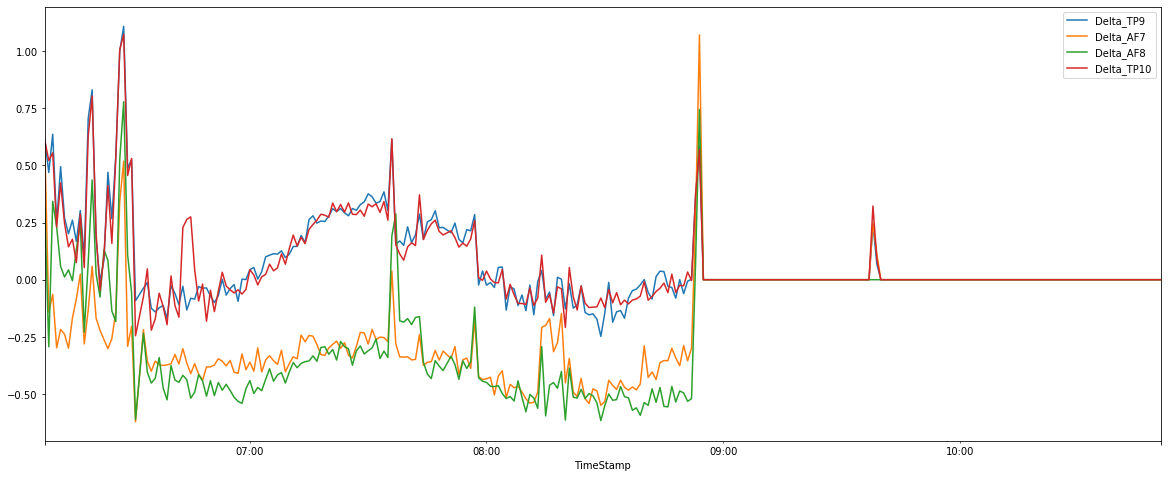

In [20]:
minutal_anxiety_onset = df_anxiety_sleep.index.to_period('Min')
df_anxiety_sleep.groupby(minutal_anxiety_onset)[delta_columns].apply(lambda x: np.mean(x)).plot()

In [62]:
df_anxiety_sleep.groupby(minutal_anxiety_onset)[delta_columns].apply(lambda x: np.mean(x))

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10
TimeStamp,,,,
2020-03-06 06:08,0.613713,0.574490,0.307850,0.608960
2020-03-06 06:09,0.469013,-0.141998,-0.293502,0.521559
2020-03-06 06:10,0.636522,-0.063942,0.342904,0.554941
2020-03-06 06:11,0.245789,-0.298193,0.230875,0.231144
2020-03-06 06:12,0.494690,-0.217526,0.058194,0.422985
...,...,...,...,...
2020-03-06 10:47,0.000000,0.000000,0.000000,0.000000
2020-03-06 10:48,0.000000,0.000000,0.000000,0.000000
2020-03-06 10:49,0.000000,0.000000,0.000000,0.000000


Spike at 9am results from waking abtuptly up after ~3h sleep period following anxiety onset.

Removed headband inmediately and forgot to take turn off :(

# Delta-Beta correlation

Plots for three scenarios.

In [41]:
plt.rcParams['figure.figsize'] = [12,6]

## Delta

In [42]:
delta_columns = ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']

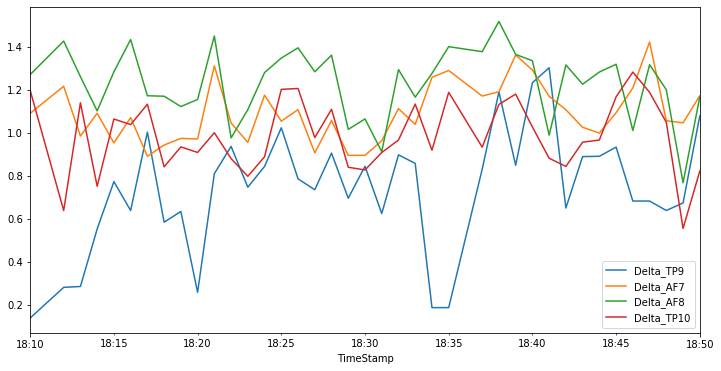

In [43]:
# Basal
minutal_basal = df_basal.index.to_period('Min')
df_basal.groupby(minutal_basal)[delta_columns].apply(lambda x: np.mean(x)).plot()

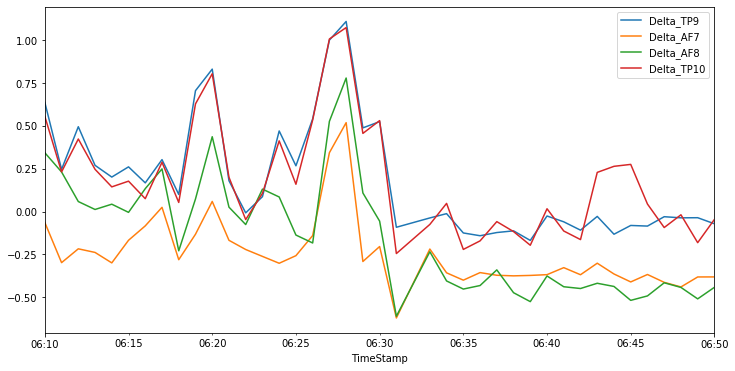

In [44]:
# High Anxiety
minutal_anxiety = df_anxiety.index.to_period('Min')
df_anxiety.groupby(minutal_anxiety)[delta_columns].apply(lambda x: np.mean(x)).plot()

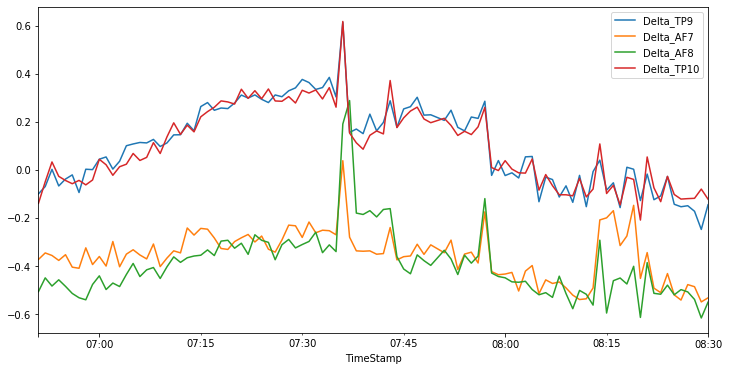

In [45]:
# Sleep
minutal_sleep = df_sleep.index.to_period('Min')
df_sleep.groupby(minutal_sleep)[delta_columns].apply(lambda x: np.mean(x)).plot()

## Beta

In [46]:
beta_columns = ['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10']

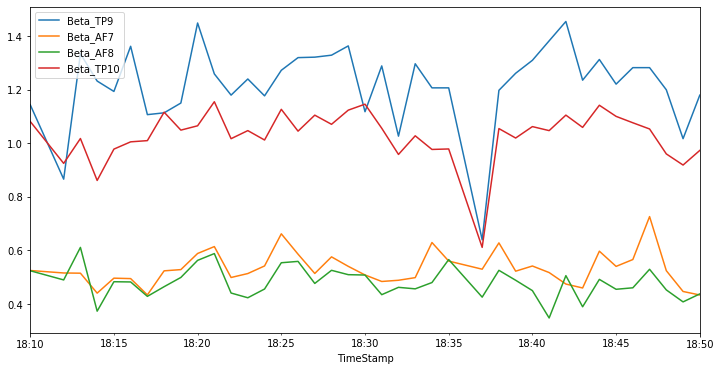

In [47]:
# Basal
df_basal.groupby(minutal_basal)[beta_columns].apply(lambda x: np.mean(x)).plot()

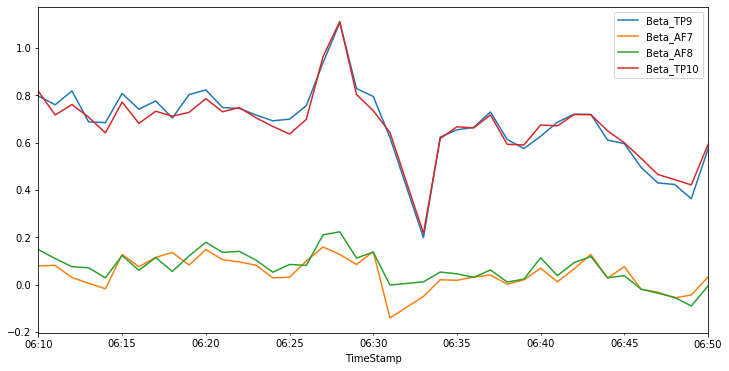

In [48]:
# High Anxiety
df_anxiety.groupby(minutal_anxiety)[beta_columns].apply(lambda x: np.mean(x)).plot()

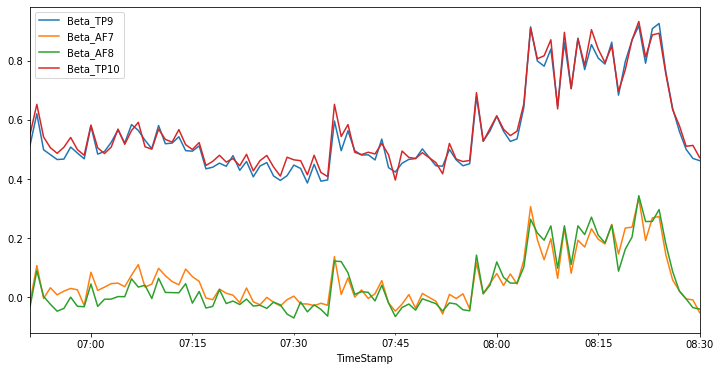

In [49]:
# Sleep
minutal_sleep = df_sleep.index.to_period('Min')
df_sleep.groupby(minutal_sleep)[beta_columns].apply(lambda x: np.mean(x)).plot()

# Anxiogenic delta-beta correlation

According to the papers cited below, a higher correlation between delta and beta amplitudes could be related to anxiogenic conditions.

See:

* Harrewijn, A., Van der Molen, M.J.W. & Westenberg, P.M. (2016). Putative EEG measures of social anxiety: Comparing frontal alpha asymmetry and delta–beta cross-frequency correlation. https://doi.org/10.3758/s13415-016-0455-y](https://doi:10.3758/s13415-016-0455-y)

* Pascalis, V., Vecchio, A., Cirillo, G. (2020). Resting anxiety increases EEG delta–beta correlation: Relationships with the Reinforcement Sensitivity Theory Personality traits. [htpps://doi:10.3758/s13415-016-0455-y](https://doi:10.3758/s13415-016-0455-y)
    
* Putman, P. (2011). Resting state EEG delta–beta coherence in relation to anxiety, behavioral inhibition, and selective attentional processing of threatening stimuli. [https://doi.org/10.1016/j.ijpsycho.2011.01.011](https://doi.org/10.1016/j.ijpsycho.2011.01.011)

In [50]:
# Averages

# Basal delta-beta
df_basal = df_basal[delta_columns + beta_columns]

df_basal['delta_avg'] = df_basal[delta_columns].mean(axis=1) # delta avg
df_basal['beta_avg'] = df_basal[beta_columns].mean(axis=1) # beta avg

# High Anxiety delta-beta
df_anxiety = df_anxiety[delta_columns + beta_columns]

df_anxiety['delta_avg'] = df_anxiety[delta_columns].mean(axis=1) # delta avg
df_anxiety['beta_avg'] = df_anxiety[beta_columns].mean(axis=1) # beta avg

# Sleep delta-beta
df_sleep = df_sleep[delta_columns + beta_columns]

df_sleep['delta_avg'] = df_sleep[delta_columns].mean(axis=1) # delta avg
df_sleep['beta_avg'] = df_sleep[beta_columns].mean(axis=1) # beta avg

Plots for three scenarios.

In [56]:
plt.rcParams['figure.figsize'] = [8, 3]

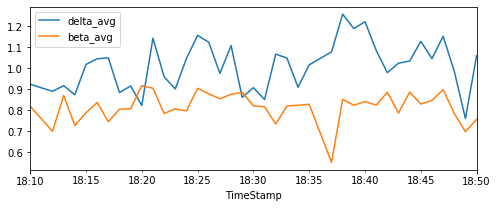

In [57]:
# Basal
df_basal.groupby(df_basal.index.to_period('Min'))[['delta_avg', 'beta_avg']].apply(lambda x: np.mean(x)).plot()

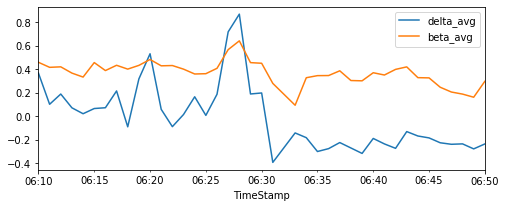

In [58]:
# High Anxiety
df_anxiety.groupby(df_anxiety.index.to_period('Min'))[['delta_avg', 'beta_avg']].apply(lambda x: np.mean(x)).plot()

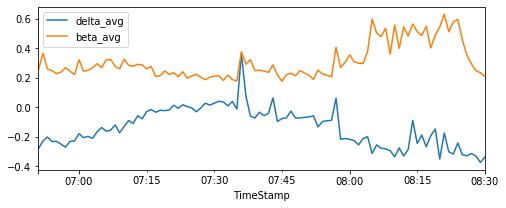

In [59]:
# Sleep
df_sleep.groupby(df_sleep.index.to_period('Min'))[['delta_avg', 'beta_avg']].apply(lambda x: np.mean(x)).plot()

In [60]:
# Basal
rho1 = df_basal[['delta_avg', 'beta_avg']].dropna().corr()

# High Anxiety
rho2 = df_anxiety[['delta_avg', 'beta_avg']].dropna().corr()

# Sleep
rho3 = df_sleep[['delta_avg', 'beta_avg']].dropna().corr()

In [61]:
rho1

,delta_avg,beta_avg
delta_avg,1.000000,0.270172
beta_avg,0.270172,1.000000


In [60]:
rho2

,delta_avg,beta_avg
delta_avg,1.000000,0.468012
beta_avg,0.468012,1.000000


In [63]:
rho3

,delta_avg,beta_avg
delta_avg,1.000000,-0.103392
beta_avg,-0.103392,1.000000
